In [1]:
import warnings
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from src import utils, plotting

warnings.filterwarnings("ignore")
pd.set_option("display.float_format", "{:,.2f}".format)

In [2]:
ticker = "^SPX"
stock = yf.Ticker(ticker.upper())
history = stock.history(period="max")

In [3]:
history.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,"24,347.00","24,347.00","24,347.00","24,347.00","24,347.00","24,347.00","24,347.00"
mean,634.12,657.66,649.83,654.00,"916,576,850.39",0.00,0.00
std,"1,085.67","1,080.58","1,068.62","1,074.99","1,625,273,346.37",0.00,0.00
min,0.00,4.40,4.40,4.40,0.00,0.00,0.00
25%,9.72,24.73,24.73,24.73,"1,540,000.00",0.00,0.00
50%,43.35,103.33,101.71,102.48,"20,670,000.00",0.00,0.00
75%,"1,046.78","1,052.50","1,037.53","1,046.66","1,023,200,000.00",0.00,0.00
max,"6,040.11","6,053.58","6,035.33","6,047.15","11,456,230,000.00",0.00,0.00


In [4]:
history

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.66,17.66,17.66,17.66,0,0.00,0.00
1928-01-03 00:00:00-05:00,17.76,17.76,17.76,17.76,0,0.00,0.00
1928-01-04 00:00:00-05:00,17.72,17.72,17.72,17.72,0,0.00,0.00
1928-01-05 00:00:00-05:00,17.55,17.55,17.55,17.55,0,0.00,0.00
1928-01-06 00:00:00-05:00,17.66,17.66,17.66,17.66,0,0.00,0.00
...,...,...,...,...,...,...,...
2024-11-25 00:00:00-05:00,"5,992.28","6,020.75","5,963.91","5,987.37",5633150000,0.00,0.00
2024-11-26 00:00:00-05:00,"6,000.03","6,025.42","5,992.27","6,021.63",3835170000,0.00,0.00
2024-11-27 00:00:00-05:00,"6,014.11","6,020.16","5,984.87","5,998.74",3363340000,0.00,0.00


In [21]:
history["date"] = pd.to_datetime(history.index)
last_date_each_year = history.groupby(history["date"].dt.day).all()
last_date_each_year

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,Indicator
date,,,,,,,,,
1,True,True,True,True,True,False,False,True,True
2,True,True,True,True,True,False,False,True,True
3,True,True,True,True,True,False,False,True,True
4,True,True,True,True,True,False,False,True,True
5,True,True,True,True,True,False,False,True,True
6,True,True,True,True,True,False,False,True,True
7,True,True,True,True,True,False,False,True,True
8,True,True,True,True,True,False,False,True,True
9,True,True,True,True,True,False,False,True,True


In [6]:
stock.info

{'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 6032.38,
 'open': 6040.11,
 'dayLow': 6035.33,
 'dayHigh': 6053.58,
 'regularMarketPreviousClose': 6032.38,
 'regularMarketOpen': 6040.11,
 'regularMarketDayLow': 6035.33,
 'regularMarketDayHigh': 6053.58,
 'volume': 2739356488,
 'regularMarketVolume': 2739356488,
 'averageVolume': 3906019682,
 'averageVolume10days': 4003200000,
 'averageDailyVolume10Day': 4003200000,
 'bid': 6018.66,
 'ask': 6097.08,
 'fiftyTwoWeekLow': 4546.5,
 'fiftyTwoWeekHigh': 6053.58,
 'fiftyDayAverage': 5838.88,
 'twoHundredDayAverage': 5455.174,
 'currency': 'USD',
 'exchange': 'WCB',
 'quoteType': 'INDEX',
 'symbol': '^SPX',
 'underlyingSymbol': '^GSPC',
 'shortName': 'S&P 500 INDEX',
 'longName': 'S&P 500 INDEX',
 'firstTradeDateEpochUtc': -1325583000,
 'timeZoneFullName': 'America/New_York',
 'timeZoneShortName': 'EST',
 'uuid': '598377dc-b757-301a-9621-bbef63eca4d0',
 'messageBoardId': 'finmb_INDEXSPX',
 'gmtOffSetMilliseconds': -18000000,
 'trailingPegR

In [7]:
stock.financials

""


In [8]:
stock.cash_flow

""


In [9]:
stock.balance_sheet

""


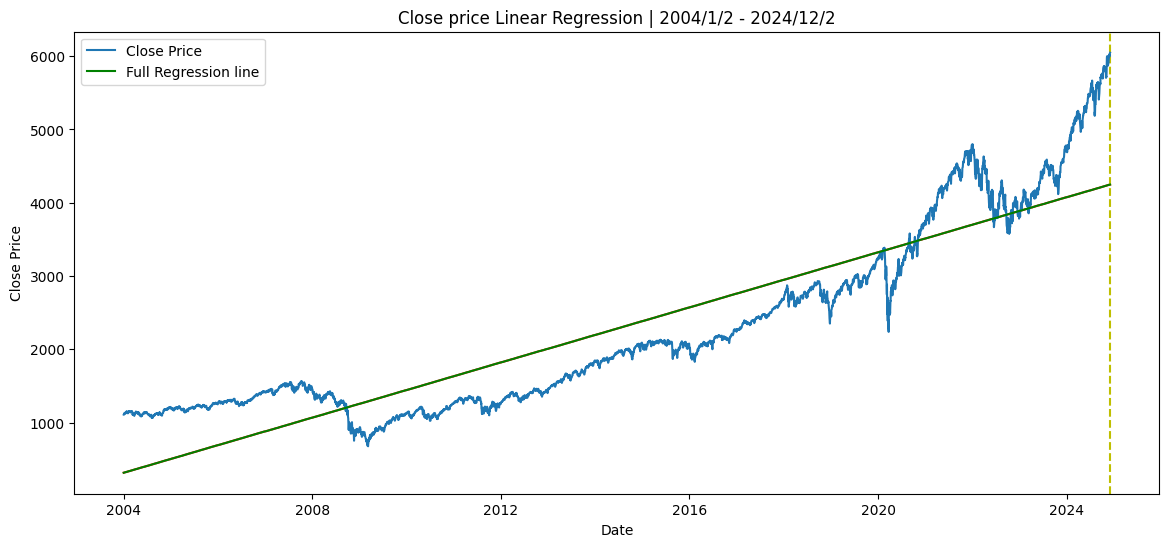

Coefficient (slope): 0.7469453711172215


In [10]:
a = plotting.plot_regression_line(history["2004":], reg_line_count=0, log_scale=False)

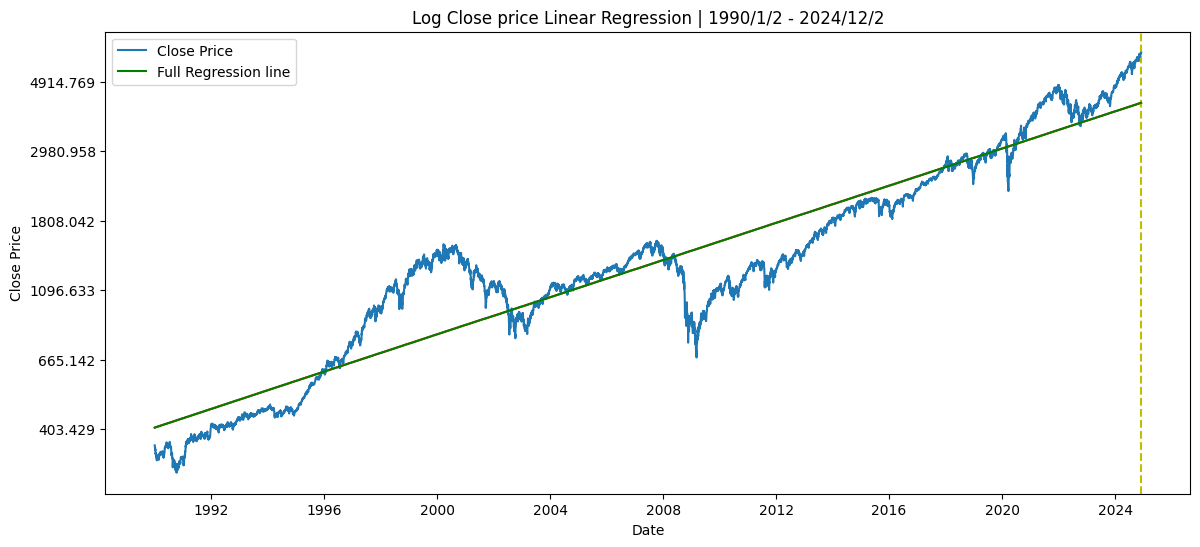

Coefficient (slope): 0.00026540983128051787


<module 'matplotlib.pyplot' from '/Users/ivankyulev/Projects/Notebooks/.venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

In [11]:
plotting.plot_regression_line(history["1990":], reg_line_count=1, log_scale=True)

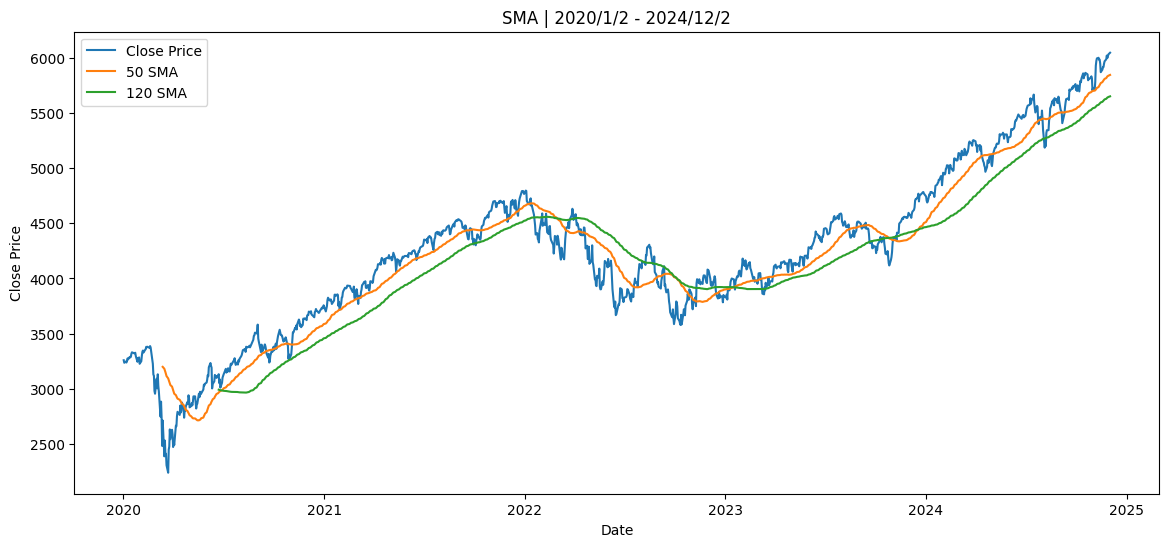

<BarContainer object of 24347 artists>

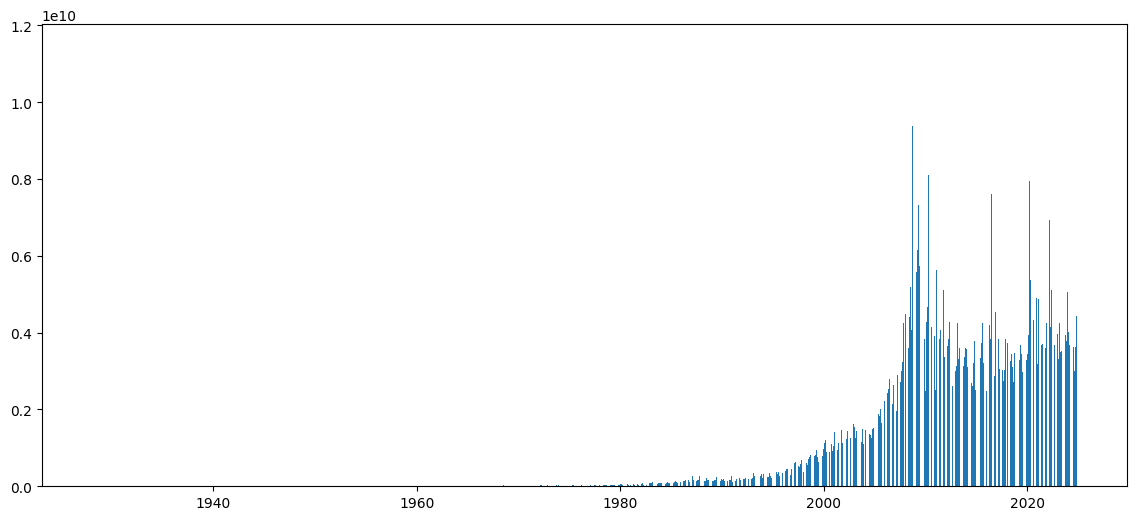

In [12]:
plotting.plot_sma(history["2020":], [50, 120], hide_data=False)
plt.figure(figsize=(14, 6))
plt.bar(history.index, history["Volume"])

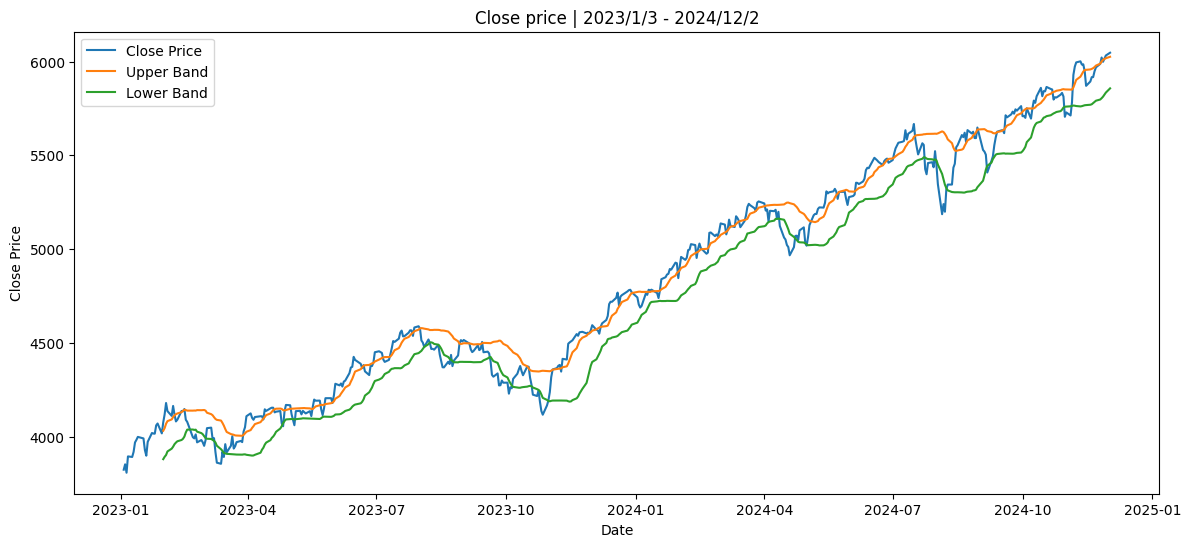

In [13]:
plotting.plot_bolinger_bands(history["2023":], 20, 1)

In [14]:
import ta
import pandas as pd
from ta.utils import dropna

history = history["2020":]
indicator = ta.momentum.RSIIndicator(history["Close"])

history["Indicator"] = indicator.rsi()

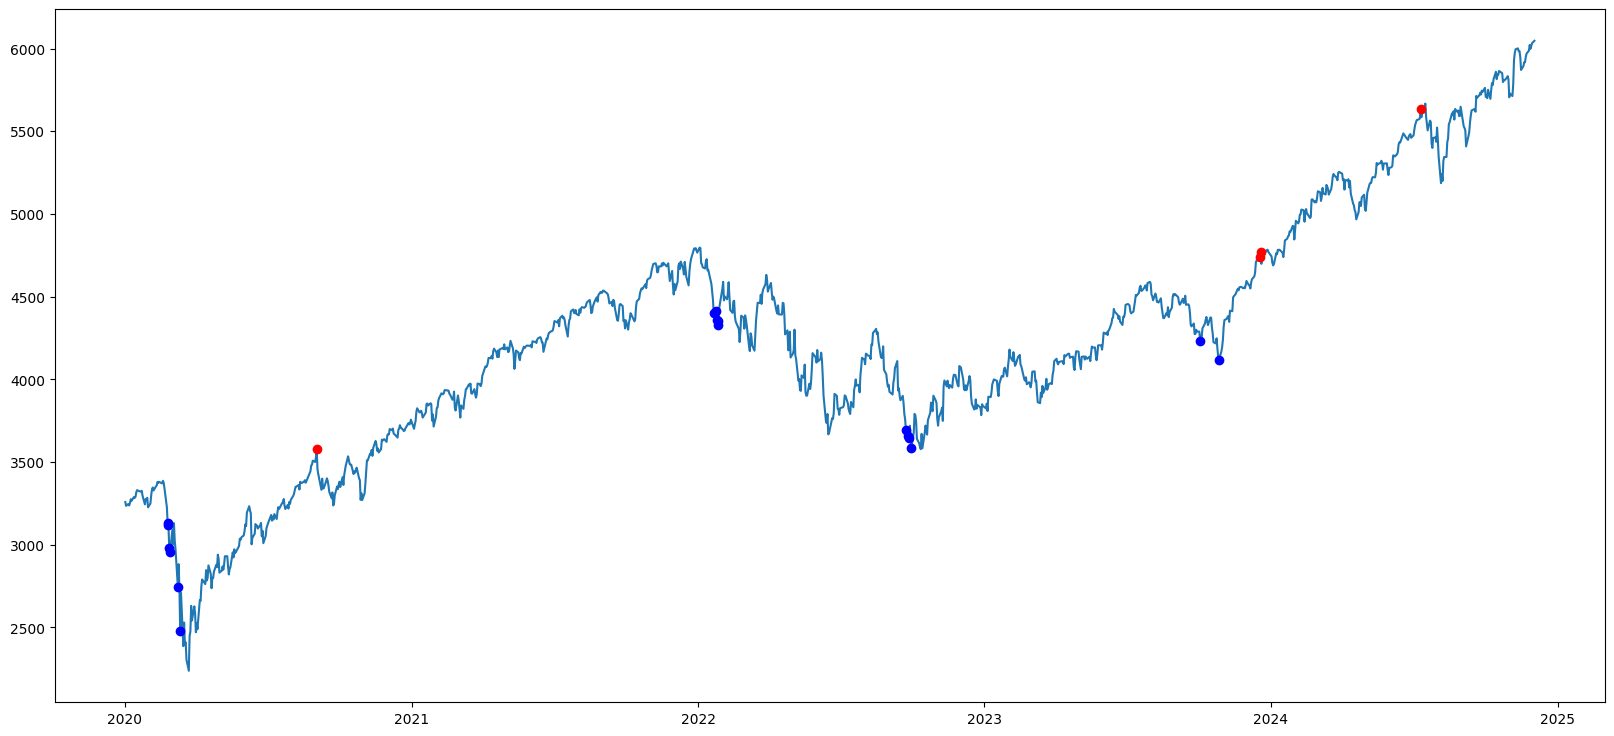

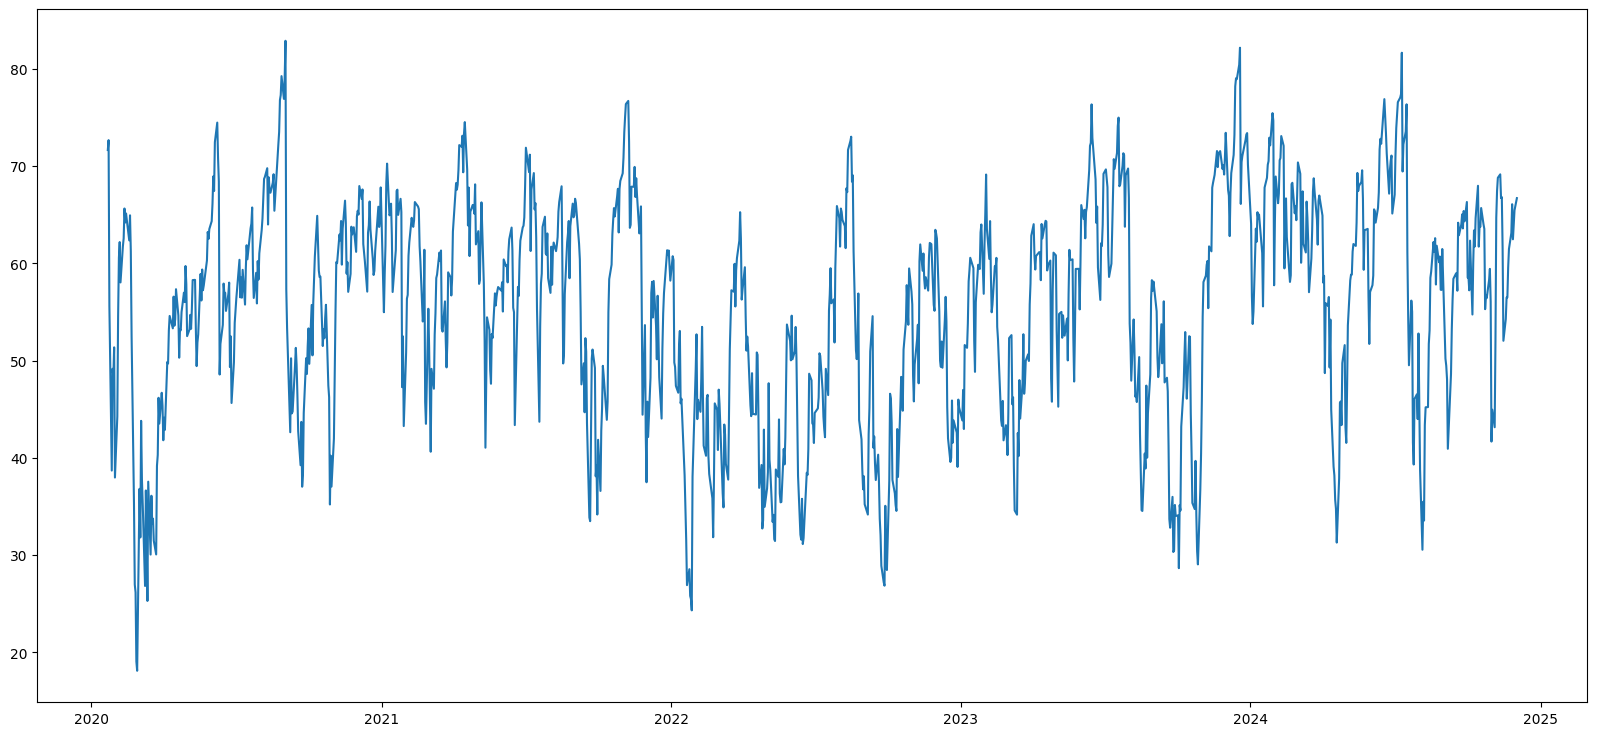

In [15]:
plt.figure(figsize=(20, 9))
plt.plot(history["Close"])
filter_high = history["Indicator"] >= 80
filter_low = history["Indicator"] <= 30
plt.plot(
    history.index[filter_high],
    history["Close"][filter_high],
    marker="o",
    linestyle="None",
    color="red",
)
plt.plot(
    history.index[filter_low],
    history["Close"][filter_low],
    marker="o",
    linestyle="None",
    color="blue",
)
plt.figure(figsize=(20, 9))
plt.plot(history["Indicator"])

In [16]:
type(history["Close"])

pandas.core.series.Series